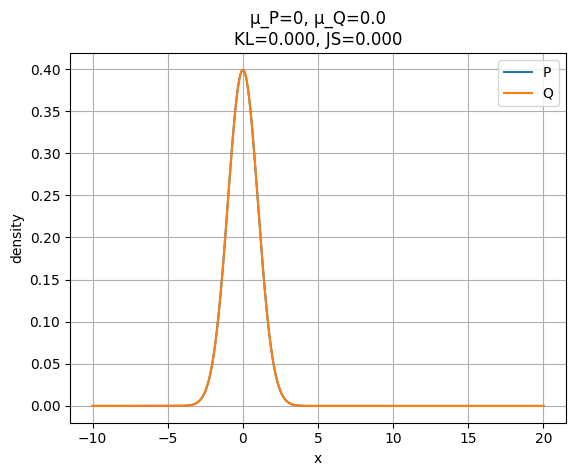

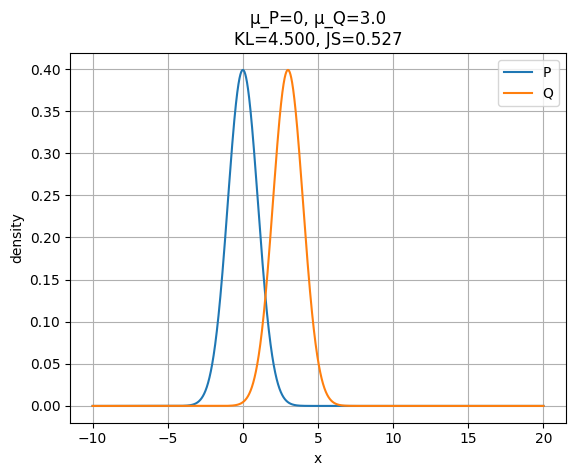

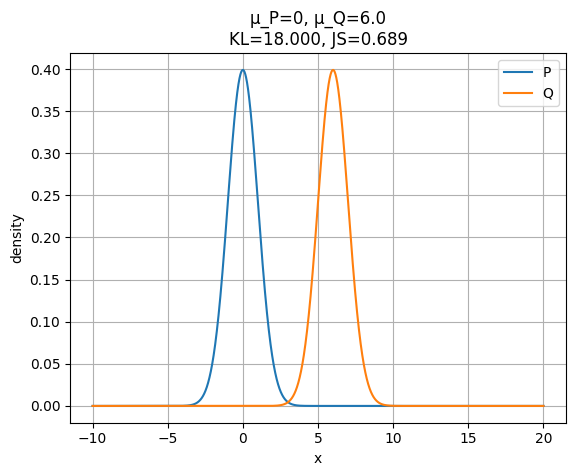

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# 定義
mu_p = 0.0
sigma = 1.0
mus_q = [0.0, 3.0, 6.0]

# x のグリッド
x = np.linspace(-10, 20, 10000)
p = norm.pdf(x, loc=mu_p, scale=sigma)

# 発散を計算してプロット
for mu_q in mus_q:
    q = norm.pdf(x, loc=mu_q, scale=sigma)
    
    # KL divergence (解析式)
    kl = (mu_p - mu_q)**2 / (2 * sigma**2)
    
    # JS divergence (数値積分)
    m = 0.5 * (p + q)
    eps = 1e-12
    kl_pm = np.trapz(p * np.log((p + eps) / (m + eps)), x)
    kl_qm = np.trapz(q * np.log((q + eps) / (m + eps)), x)
    js = 0.5 * (kl_pm + kl_qm)
    
    # プロット
    plt.figure()
    plt.plot(x, p, label='P')
    plt.plot(x, q, label='Q')
    plt.title(f'μ_P=0, μ_Q={mu_q}\nKL={kl:.3f}, JS={js:.3f}')
    plt.xlabel('x')
    plt.ylabel('density')
    plt.legend()
    plt.grid(True)

plt.show()
